In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
#import iris data sets
data = pd.read_csv('Iris.csv')

In [4]:
#first 5 row data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
#disciribe stat data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#count the Species
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

/home/snk/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


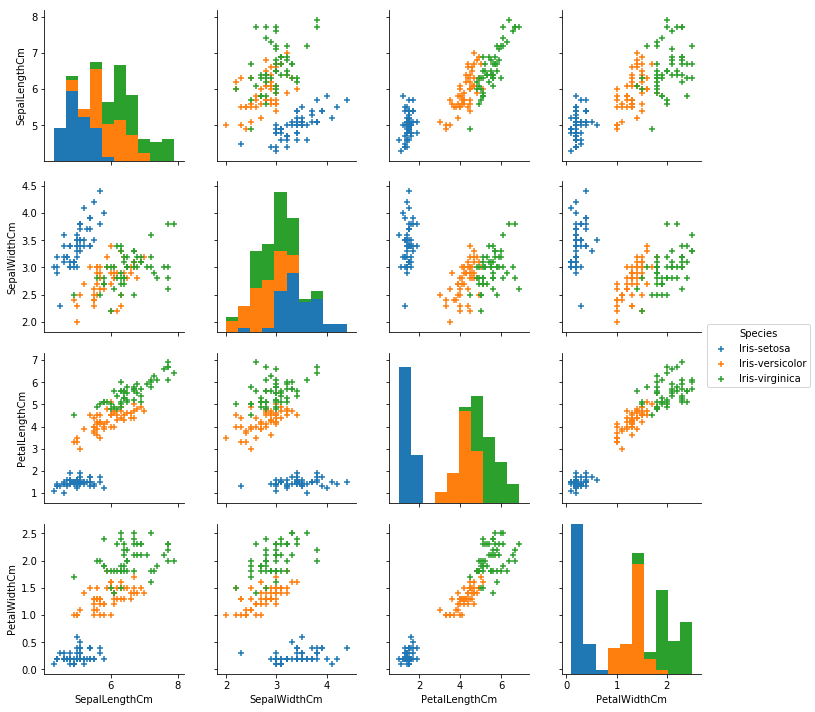

In [8]:
#data visulalization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
tmp= data.drop('Id', axis= 1)
g= sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

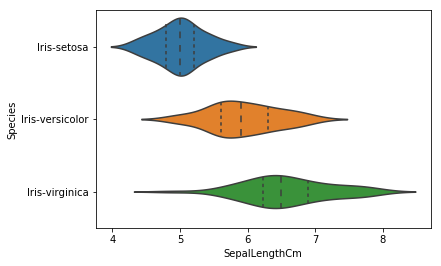

In [9]:
g= sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')

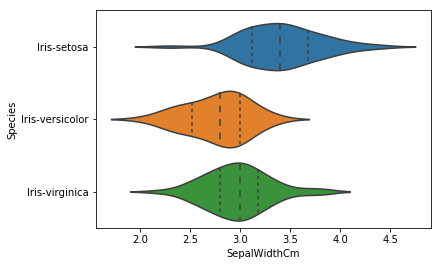

In [10]:
#special width
g = sns.violinplot(y='Species', x ='SepalWidthCm' ,data = data, inner= 'quartile')

In [14]:
#modeling in iris data 
X = data.drop(['Id','Species'],axis= 1)
y=data['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Text(0,0.5,'knn unkwon')

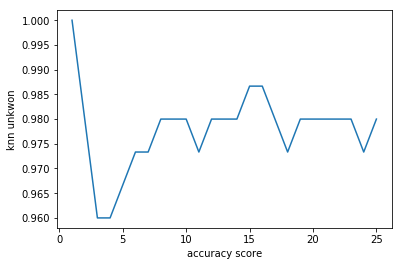

In [15]:


#creating train and test data experimenting deffernt values
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
knn_range =list(range(1,26))
score=[]
for i in knn_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    score.append(metrics.accuracy_score(y,y_pred))
plt.plot(knn_range,score)
plt.xlabel('accuracy score')
plt.ylabel('knn unkwon')



In [16]:
#logistic regrestion
logreg=LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y,y_pred))
#print(y_pred)

0.96


In [17]:
#spliting data sets
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(90, 4)
(90,)
(60,)
(60, 4)


In [18]:
#train_test_split
knn_range=list(range(1,26))
score = []
for i in knn_range:
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_pred))
   # print(np.array(score).mean())

In [19]:
#logical regression
logr= LogisticRegression()
logr.fit(X_train,y_train)
y_pred =logr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9333333333333333


In [20]:

#shows knn neihber code 12 gives best output
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X,y)
print(knn.predict([[4.7,3.2,1.3,0.2]]))



['Iris-setosa']
